In [2]:
import numpy as np 
import pandas as pd
import Bio
from Bio.pairwise2 import format_alignment
import copy
import Process_SeqLibrary_Finkelsteinlab as preprocess
reload(preprocess);
import plotting_Finkelsteinlab as pltData
reload(pltData);
%matplotlib inline 
import matplotlib.pylab as plt 

In [12]:
## Arguments
Cas='Cas9'
target_D = 'TTTAGTGATAAGTGGAATGCCATGTGG'
target_E = 'TTTAGACGCATAAAGATGAGACGCTGG'
target = 'E'
variant = 'Enh'
on_target = target_E
seq_colname = 'sequence'
output_colnames = ['ABA', 'error']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 20
filename = 'Target' + target + '-d' + Cas + '-' + variant + '_AbsoluteABA.csv'
Path = '../data_CHAMP_Finkelsteinlab/'
out_file_name = filename.split('.')[0]
out_path = Path
data = pd.read_csv(Path+filename)
new_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = True, Mut_type = ['OT','r'], Mut_min = Mut_min, Mut_max = Mut_max,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = True)


'TargetE-dCas9-Enh_AbsoluteABA'

### Nucleaseq Cas9 Target E

In [2]:
filename = 'ECas9_cleavage_rate_and_y0.txt'
Path = '../data_nucleaseq_Finkelsteinlab/targetE/'
data = pd.read_table(Path+filename, usecols=['target', 'cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl'])
data.rename(columns={'target':'Sequence'}, inplace=True)

In [3]:
## Arguments
Cas='Cas9'
on_target = 'TTTAGACGCATAAAGATGAGACGCTGG'
seq_colname = 'Sequence'
output_colnames = ['cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 2
out_file_name = filename.split('.')[0]
out_path = '../data_nucleaseq_Finkelsteinlab/targetE/'

In [4]:
new_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = True, Mut_type = ['OT','r'], Mut_min = 0, Mut_max = 2,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = False)


In [5]:
new_data.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
5,GTTAGACGCAAAAAGATGAGACGCTGG,0.006562,0.005024,0.008606,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||||||.||||||\nCG...,CGCAGAGTAGAAATA-CGCAG\n||||||||||||| | |||||\n...,r:14:A,r,1.0,14
6,TTTAGATGCATAAAGATGAGGCGCTGG,0.000542,0.000439,0.000817,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||.|||||||||||||.||\nCG...,CGCAG-AGTAGAAATACGC-AG\n||| | |||||||||||| ||...,r:4:G|r:18:T,r,2.0,4|18
7,TTTAGACGCATAAAGATGAGACGCTGG,0.182457,0.111880,0.191265,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,OT,OT,0.0,
12,TTTAAGACGCATAAAGATGAGACGCTGG,0.168158,0.112466,0.186088,True,TGG,True,1,CGCAGAGTAGAAATACGCAG-\n|||||||||||||||||||| \n...,CGCAGAGTAGAAATACGCAG-\n|||||||||||||||||||| \n...,OT,OT,0.0,
13,TTTAGACGCATAAAGATGAGACGCTGG,0.210355,0.158494,0.312250,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,OT,OT,0.0,


In [6]:
full_data = preprocess.process_Finkelstein_Library(data,on_target,seq_colname,output_colnames,Cas='Cas9', 
                                                   out_path = out_path,out_file_name = out_file_name,
                                                   nofilter = True, save_data = False)

In [7]:
full_data.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,TTTAGAGCGTATTTCATGAGACGCTGG,2.657239e-06,6.222793e-24,0.000004,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||.........||\nCG...,CGCAGAGTAGAAA-T--AC-GC-AG\n|||||||| | | | ...,r:10:C|r:11:T|r:12:T|r:13:T|r:14:A|r:15:T|r:16...,r,9.0,10|11|12|13|14|15|16|17|18
1,TTTAGACTGCGATAAAGATGAGACGCTGG,2.767674e-22,1.326366e-25,0.000005,False,TGG,True,2,CGCAGAGTAGAAATA-CG-CAG\n||||||||||||||| || |||...,CGCAGAGTAGAAATA-CG-CAG\n||||||||||||||| || |||...,i:16:G|i:18:T,i,2.0,16|18
2,TTTAGACGCATAAAGATGAGACGCCTTAA,1.199120e-06,1.717058e-27,0.000002,False,TAA,False,2,-C-GCAGAGTAGAAATACGCAG\n | |||||||||||||||||||...,-C-GCAGAGTAGAAATACGCAG\n | |||||||||||||||||||...,i:1:T|i:2:C,i,2.0,1|2
3,TTTAGACGCATAAAGATGAGACGCTAGGA,5.308185e-05,4.825889e-05,0.000069,False,GGA,False,2,--CGCAGAGTAGAAATACGCAG\n ||||||||||||||||||||...,--CGCAGAGTAGAAATACGCAG\n ||||||||||||||||||||...,i:1:A|i:1:T,i,2.0,1|1
4,TTTAGACGTCAGTAAAGATGAGACGCTGG,8.747661e-25,7.856313e-27,0.000001,False,TGG,True,2,CGCAGAGTAGAAAT-AC-GCAG\n|||||||||||||| || ||||...,CGCAGAGTAGAAAT-AC-GCAG\n|||||||||||||| || ||||...,i:15:G|i:17:T,i,2.0,15|17


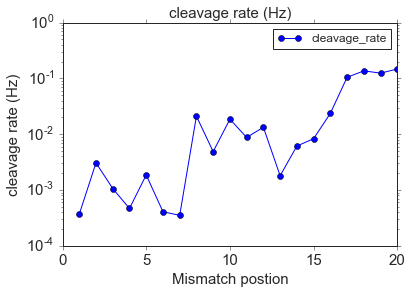

In [8]:
reload(pltData);
_ = pltData.plot_single_mut_data(full_data, 'cleavage_rate', 'r', Canonical=True, data_name='cleavage rate (Hz)', Plot=True, 
                                                    logplot=True, SaveFigures=False)

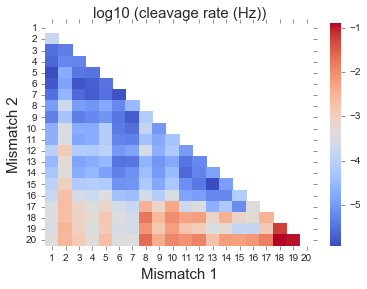

In [9]:
reload(pltData);
_, _ = pltData.plot_double_mut_data(full_data, 'cleavage_rate', 'r', Canonical=True, Ng=20, data_name='cleavage rate (Hz)', Plot=True, logplot=True,
                        SaveFigures=False, figure_name='./Figure.pdf')

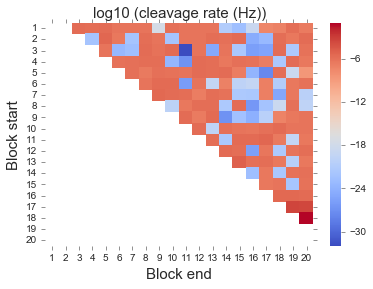

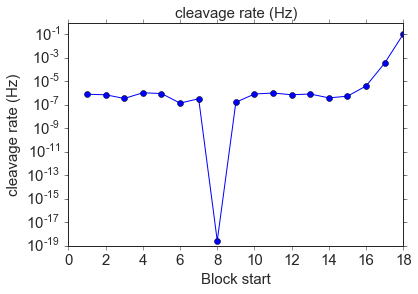

In [10]:
_, _, _ = pltData.plot_block_mm_data(full_data, 'cleavage_rate', data_name='cleavage rate (Hz)', Canonical=True, Ng=20, Plot=True, logplot=True,
                        SaveFigures=False, figure_names=['./Figure1.pdf','./Figure2.pdf'])

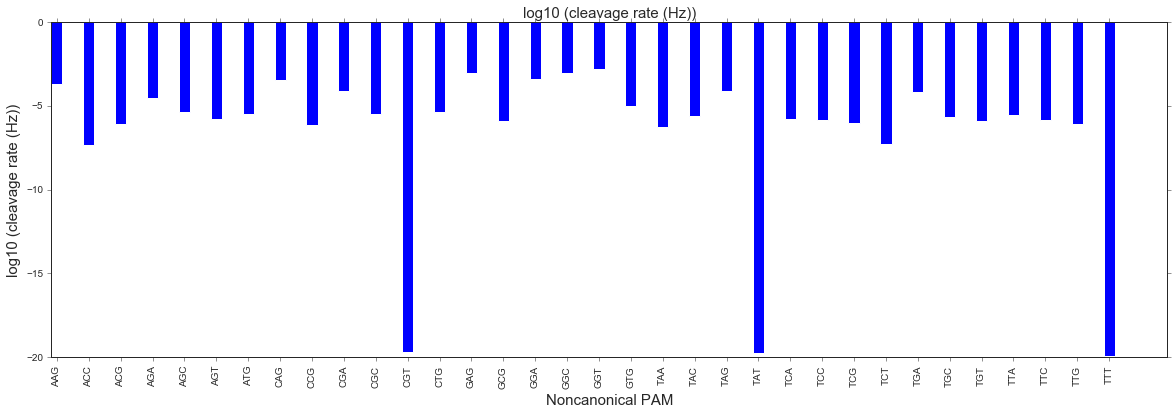

In [11]:
_=pltData.plot_mut_PAM(full_data,'cleavage_rate', data_name='cleavage rate (Hz)', Plot=True, logplot=True,
                         SaveFigures=False, figure_name='./Figure.pdf')

### Champ data Cas12aTarget D

In [12]:
filename = 'cas12a-target-d-replicate-1-delta-abas.txt'
Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
data = pd.read_table(Path+filename, skiprows=3)
Cas='Cas12a'
on_target = 'TTTAGTGATAAGTGGAATGCCATGTGG'
seq_colname = '# Sequence'
output_colnames = ['Delta ABA (kBT)', 'Uncertainty']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 20
out_file_name = filename.split('.')[0]
out_path = Path

In [13]:
ABA_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = Canonical_PAM, Mut_type = Mut_type, Mut_min = Mut_min, Mut_max = Mut_max,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = True)

In [14]:
ABA_data.head()

,# Sequence,Delta ABA (kBT),Uncertainty,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
1,TTTAGTGATATGTAGAATGCCATGTGG,3.359060,0.106980,False,TTTA,True,0,GTGATAAGTGGAATGCCATG\n||||||.||.||||||||||\nGT...,GTGATAAGTG--GAATGCCATG\n||||| | || ||||||||||...,r:7:T|r:10:A,r,2.0,7|10
5,TTTAGTGATAACTGGACTGCCATGTGG,3.162534,0.121328,False,TTTA,True,0,GTGATAAGTGGAATGCCATG\n|||||||.||||.|||||||\nGT...,GTGATAAG-TGGAA-TGCCATG\n||||||| ||| | |||||||...,r:8:C|r:13:C,r,2.0,8|13
8,TTTAGTCATAAGTGGAATGCTATGTGG,4.836353,0.118964,False,TTTA,True,0,GTGATAAGTGGAATGCCATG\n||.|||||||||||||.|||\nGT...,GTG-ATAAGTGGAATGCC-ATG\n|| |||||||||||| | |||...,r:3:C|r:17:T,r,2.0,3|17
9,TTTAGTGATAAATGGAATGCCACGTGG,2.748675,0.149763,False,TTTA,True,0,GTGATAAGTGGAATGCCATG\n|||||||.||||||||||.|\nGT...,GTGATAAG-TGGAATGCCAT-G\n||||||| |||||||||| |...,r:8:A|r:19:C,r,2.0,8|19
11,TTTAATTATAAGTGGAATGCCATGTGG,4.756814,0.108307,False,TTTA,True,0,GTGATAAGTGGAATGCCATG\n.|.|||||||||||||||||\nAT...,G-TG-ATAAGTGGAATGCCATG\n | |||||||||||||||||...,r:1:A|r:3:T,r,2.0,1|3


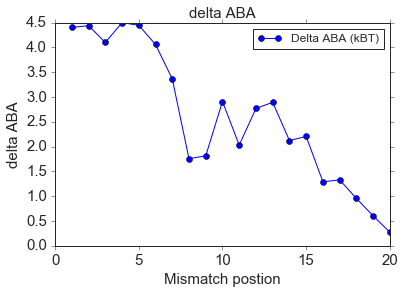

In [15]:
_= pltData._= pltData.plot_single_mut_data(ABA_data, 'Delta ABA (kBT)', 'r', Canonical=True, data_name='delta ABA', Plot=True, logplot=False,
                         SaveFigures=False, figure_name='./Figure.pdf')

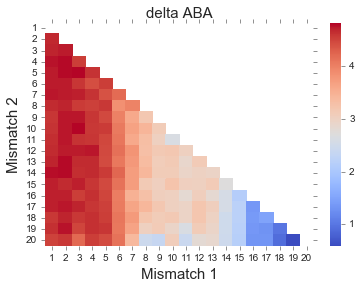

In [16]:
_,_ = pltData.plot_double_mut_data(ABA_data, 'Delta ABA (kBT)', 'r', Canonical=True, Ng=20, data_name='delta ABA', Plot=True, logplot=False,
                        SaveFigures=False, figure_name='./Figure.pdf')

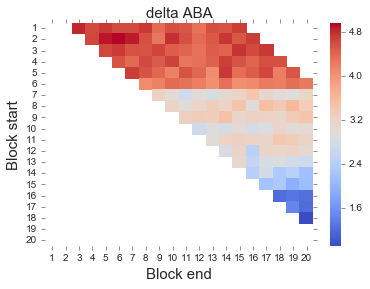

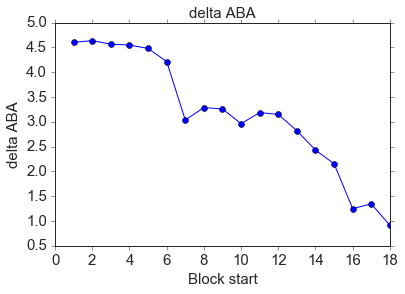

In [17]:
_,_,_ = pltData.plot_block_mm_data(ABA_data, 'Delta ABA (kBT)', data_name='delta ABA', Canonical=True, Ng=20, Plot=True, logplot=False,
                        SaveFigures=False, figure_names=['./Figure1.pdf','./Figure2.pdf'])

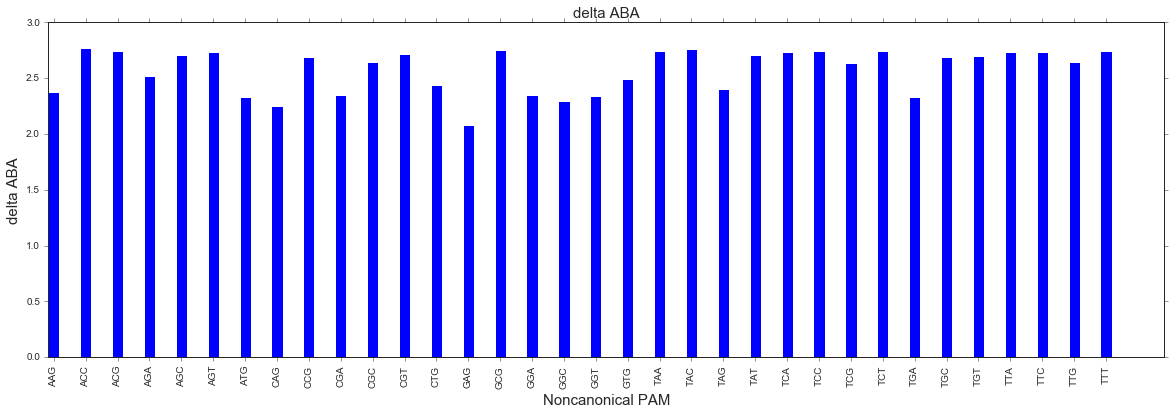

In [18]:
df=pltData.plot_mut_PAM(ABA_data,'Delta ABA (kBT)', data_name='delta ABA', Plot=True, logplot=False,
                         SaveFigures=False, figure_name='./Figure.pdf')

### Champ data Target E Absolute ABA

In [3]:
filename = 'TargetE-dCas9_AbsoluteABA_raw.csv'
Path = '../data_CHAMP_Finkelsteinlab/'
data = pd.read_csv(Path+filename)
Cas='Cas9'
on_target = 'TTTAGACGCATAAAGATGAGACGCTGG'
seq_colname = 'sequence'
output_colnames = ['ABA', 'error']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 20
out_file_name = 'TargetE-dCas9_AbsoluteABA'
out_path = Path

In [14]:
nofilter=True 

ABA_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = Canonical_PAM, Mut_type = Mut_type, Mut_min = Mut_min, Mut_max = Mut_max,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = nofilter,
                                                  save_data = False)
ABA_data = ABA_data[ABA_data.error>0.0]



PAM_type = 'nonCanonical'
if Canonical_PAM:
    PAM_type = 'Canonical'
Mut_str = '-'.join(Mut_type)
output_filename = out_path+out_file_name+'_'+PAM_type+'_'+Mut_str+'_'+str(Mut_min)+'-'+str(Mut_max)+'.csv'
if nofilter:
    output_filename = out_path+out_file_name+'_'+'full'+'.csv'
ABA_data.to_csv(output_filename, index=False)

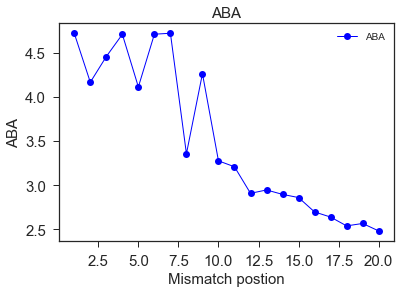

In [16]:
_= pltData._= pltData.plot_single_mut_data(ABA_data, 'ABA', 'r', Canonical=True, data_name='ABA', Plot=True, logplot=False,
                         SaveFigures=False, figure_name='./Figure.pdf')

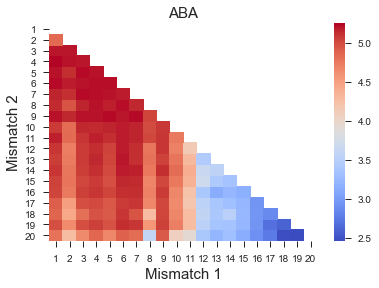

In [17]:
_,_ = pltData.plot_double_mut_data(ABA_data, 'ABA', 'r', Canonical=True, Ng=20, data_name='ABA', Plot=True, logplot=False,
                        SaveFigures=False, figure_name='./Figure.pdf')

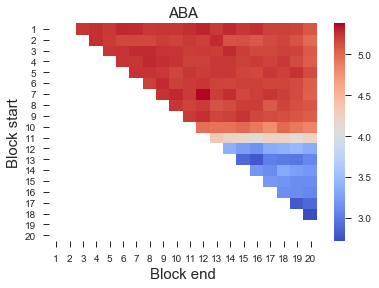

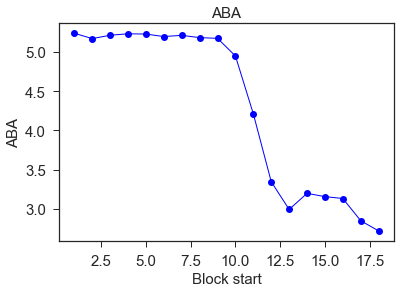

In [20]:
_,_,_ = pltData.plot_block_mm_data(ABA_data, 'ABA', data_name='ABA', Canonical=True, Ng=20, Plot=True, logplot=False,
                        SaveFigures=False, figure_names=['./Figure1.pdf','./Figure2.pdf'])

In [24]:
nofilter=False 
Mut_max = 20

ABA_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = Canonical_PAM, Mut_type = Mut_type, Mut_min = Mut_min, Mut_max = Mut_max,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = nofilter,
                                                  save_data = False)
ABA_data = ABA_data[ABA_data.error>0.0]



PAM_type = 'nonCanonical'
if Canonical_PAM:
    PAM_type = 'Canonical'
Mut_str = '-'.join(Mut_type)
output_filename = out_path+out_file_name+'_'+PAM_type+'_'+Mut_str+'_'+str(Mut_min)+'-'+str(Mut_max)+'.csv'
if nofilter:
    output_filename = out_path+out_file_name+'_'+'full'+'.csv'
ABA_data.to_csv(output_filename, index=False)

### Champ data Target E  $\Delta ABA$

In [17]:
filename = 'cas9-target-e-replicate-1-delta-abas.txt'
Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
data = pd.read_table(Path+filename, skiprows=3)
Cas='Cas9'
on_target = 'TTTAGACGCATAAAGATGAGACGCTGG'
seq_colname = '# Sequence'
output_colnames = ['Delta ABA (kBT)', 'Uncertainty']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 20
out_file_name = filename.split('.')[0]
out_path = Path

In [18]:
ABA_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = Canonical_PAM, Mut_type = Mut_type, Mut_min = Mut_min, Mut_max = Mut_max,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = True,
                                                  save_data = False)

In [14]:
ABA_data.head()

,# Sequence,Delta ABA (kBT),Uncertainty,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,TTTAGACCCATAAAGATAAGACGCTGG,2.127065,0.042464,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||.|||||||||.|||\nCG...,CGCAGAG-TAGAAATACGC-AG\n|||||| ||||||||| | ||...,r:7:A|r:17:C,r,2.0,7|17
1,TTTAGACGCTTAAAGATGAGAGGCTGG,2.611770,0.039588,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||.|||||||||||.|||||\nCG...,CGC-AGAGTAGAAATA-CGCAG\n|| ||||||||||| |||||...,r:3:G|r:15:T,r,2.0,3|15
2,TTTAGGAACGCATAAAGATGAGACGCTGG,-0.325618,0.050050,False,TGG,True,2,CGCAGAGTAGAAATACGCA-G-\n||||||||||||||||||| | ...,CGCAGAGTAGAAATACGCA-G-\n||||||||||||||||||| | ...,i:20:A,i,1.0,20
3,TTTGACGCTAAAGATGAGACGCTGG,0.250845,0.061186,False,TGG,True,-2,CGCAGAGTAGAAATACGCAG\n|||||||||||||| |||| \nCG...,CGCAGAGTAGAAATACGCAG\n|||||||||||||| |||| \nCG...,d:15:A|d:20:G,d,2.0,15|20
4,TTTAGACGCATTAGGATGAGACGCTGG,1.330186,0.046995,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||.|.|||||||\nCG...,CGCAGAGTAGAA-AT-ACGCAG\n|||||||||| || ||||||...,r:11:G|r:13:T,r,2.0,11|13


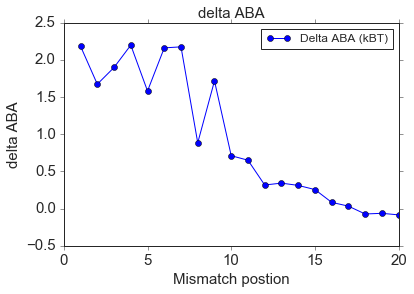

In [15]:
_= pltData._= pltData.plot_single_mut_data(ABA_data, 'Delta ABA (kBT)', 'r', Canonical=True, data_name='delta ABA', Plot=True, logplot=False,
                         SaveFigures=False, figure_name='./Figure.pdf')

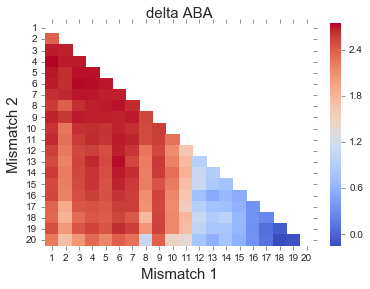

In [16]:
_,_ = pltData.plot_double_mut_data(ABA_data, 'Delta ABA (kBT)', 'r', Canonical=True, Ng=20, data_name='delta ABA', Plot=True, logplot=False,
                        SaveFigures=False, figure_name='./Figure.pdf')

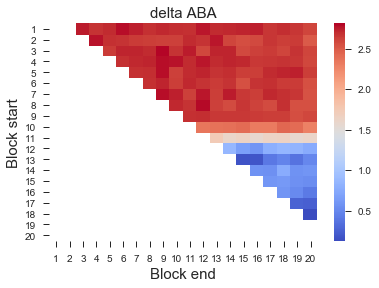

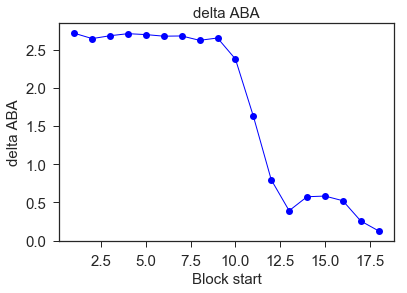

In [19]:
_,_,_ = pltData.plot_block_mm_data(ABA_data, 'Delta ABA (kBT)', data_name='delta ABA', Canonical=True, Ng=20, Plot=True, logplot=False,
                        SaveFigures=False, figure_names=['./Figure1.pdf','./Figure2.pdf'])